In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from lib.ekyn import *
from lib.env import *
import copy
from sage.utils import *

MODEL_ID = f'2024_26_08_11_38_35'

state = torch.load(f'{EXPERIMENTS_PATH}/{MODEL_ID}/state.pt',map_location='cpu',weights_only=False)
model = copy.deepcopy(state['model'])
model.load_state_dict(state['best_model_wts'])

trainloader,testloader = get_sequenced_dataloaders_loo(
    batch_size=state['batch_size'],
    sequence_length=state['sequence_length'],
    fold=state['fold']
    )
loss,y_true,y_pred = evaluate(dataloader=testloader,model=model,criterion=state['criterion'],device='cuda')

['A1-1', 'A4-0', 'B1-0', 'B3-1', 'C1-0', 'C4-0', 'C4-1', 'D1-0', 'E1-0', 'E2-1', 'E4-0', 'E4-1', 'F1-0', 'F1-1', 'F5-1'] ['A1-0']


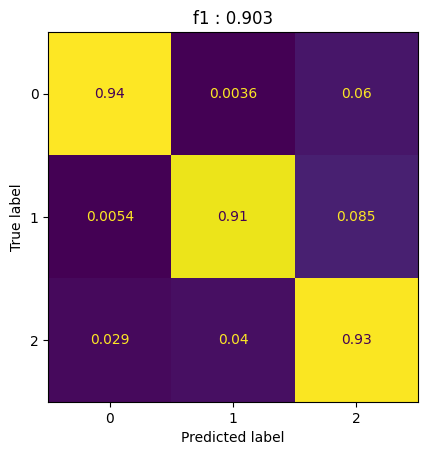

In [3]:
ConfusionMatrixDisplay.from_predictions(y_true,y_pred,normalize='true',colorbar=False)
plt.title(f'f1 : {f1_score(y_true,y_pred,average="macro"):.3f}')
plt.savefig('dumbledore_a11.jpg')